In [1]:
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("dataset1.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
dataset = dataset.drop(columns = 'id', axis = 1) #removed the column 'id'
dataset = dataset.drop(columns = 'Unnamed: 32', axis = 1) #removed the column 'Unnamed: 32'
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [4]:
# mapping these M and B variables to binary 0 and 1
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, 'B':0})
#now checking the diagnosis again to see it in binary form
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.columns #gives list of columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# grouping the features

mean_features = list(dataset.columns[1:11])
se_features = list(dataset.columns[11:21]) #standard error
w_features = list(dataset.columns[21:31]) #worst error|

In [7]:
# to see which feature correlates with the diagnosis, append diagnosis feature in the list
mean_features.append('diagnosis')
se_features.append('diagnosis')
w_features.append('diagnosis')

In [8]:
# see what the correlation values are using corr() function
corr = dataset[mean_features].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [9]:
corr = dataset[se_features].corr()
corr

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [10]:
corr = dataset[w_features].corr()
corr

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


# Training the model

In [33]:
# check the features which has high value of correlation with the diagnosis (such as radius_mean)
# we will pick such features for our model

# features that are gonna be in our model - prediction_vars

prediction_vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
                   'radius_se', 'area_se', 'radius_worst', 'perimeter_worst', 'compactness_worst']

# can choose 'concavity_worst',  'concave points_worst', 'area_worst', and 'perimeter_se' as well if want

In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size= 0.3, random_state= 1)

In [35]:
# defining train and test inputs and outputs
train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = test[prediction_vars]
test_y = test['diagnosis']

In [36]:
# run this later: sns.countplot(df['diagnosis', label ='count'])

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = RandomForestClassifier()

model.fit(train_x, train_y)

RandomForestClassifier()

In [39]:
predictions = model.predict(test_x)
test_y

421    0
47     1
292    0
186    1
414    1
      ..
6      1
487    1
11     1
268    0
419    0
Name: diagnosis, Length: 171, dtype: int64

In [40]:
train_y

249    0
58     0
476    0
529    0
422    0
      ..
129    1
144    0
72     1
235    0
37     0
Name: diagnosis, Length: 398, dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, predictions)

array([[103,   5],
       [  8,  55]], dtype=int64)

<Axes: >

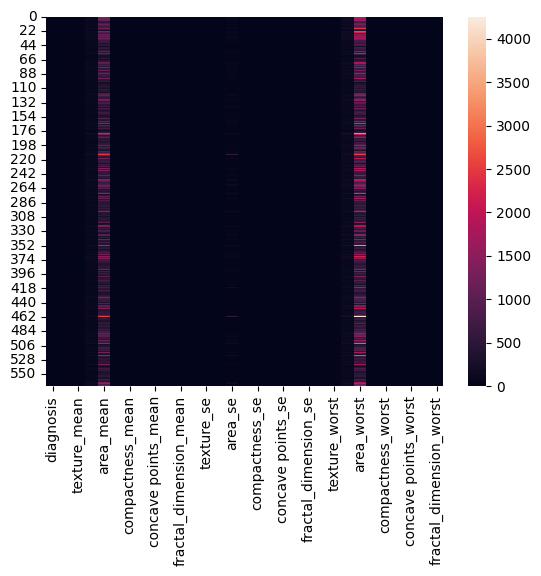

In [42]:
sns.heatmap(dataset)

<Axes: >

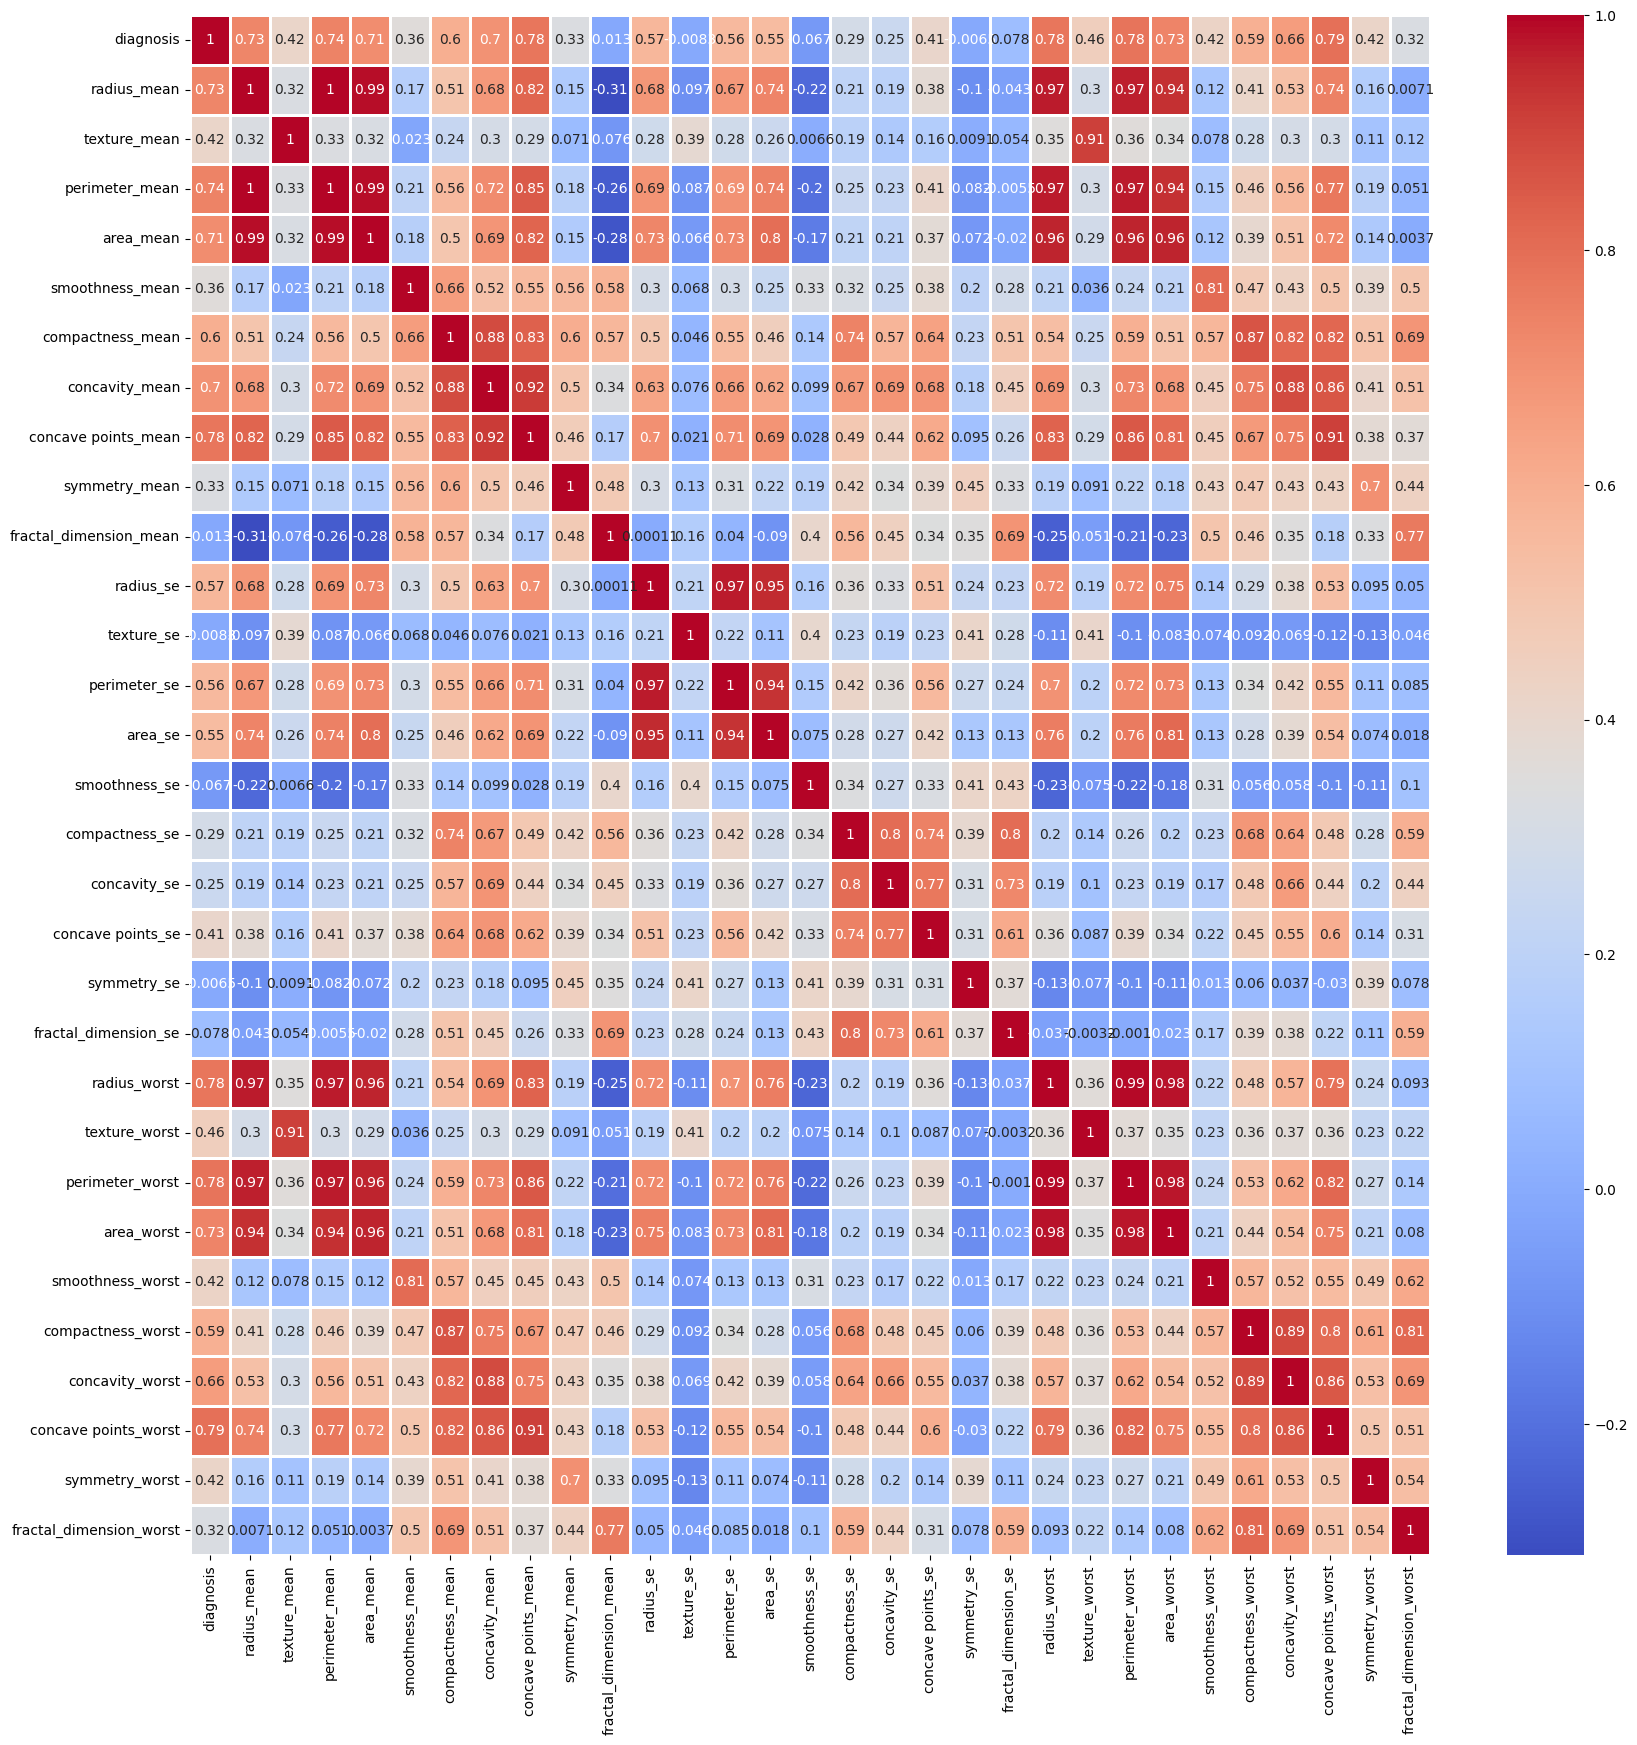

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot = True, cmap ='coolwarm', linewidths=2)

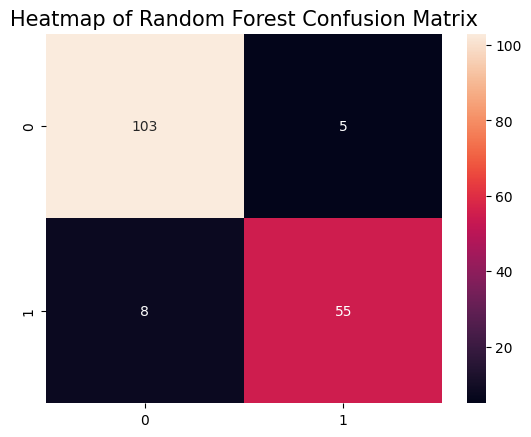

In [44]:
cm = confusion_matrix(test_y, predictions)
plt.title('Heatmap of Random Forest Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.show()

In [45]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [46]:
precision = precision_score(test_y, predictions)
print("The precision score is %.4f" % precision)

recall = recall_score(test_y, predictions)
print("The recall score is %.4f" % recall)

The precision score is 0.9167
The recall score is 0.8730


In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, predictions)
print("The accuracy score is %.4f" % accuracy)

The accuracy score is 0.9240


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming 'test_y' contains the true labels and 'predictions' contains the predicted labels

# Calculate confusion matrix
cm = confusion_matrix(test_y, predictions)
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = accuracy_score(test_y, predictions)
print("The accuracy is %.4f" % accuracy)

# Calculate precision
precision = precision_score(test_y, predictions)
print("The precision is %.4f" % precision)

# Calculate recall
recall = recall_score(test_y, predictions)
print("The recall is %.4f" % recall)

# Calculate specificity
specificity = tn / (tn + fp)
print("The specificity is %.4f" % specificity)

# Calculate F1 score
f1 = f1_score(test_y, predictions)
print("The F1 score is %.4f" % f1)

# Calculate false positive rate
fpr = fp / (fp + tn)
print("The false positive rate is %.4f" % fpr)

# Calculate false negative rate
fnr = fn / (fn + tp)
print("The false negative rate is %.4f" % fnr)


The accuracy is 0.9240
The precision is 0.9167
The recall is 0.8730
The specificity is 0.9537
The F1 score is 0.8943
The false positive rate is 0.0463
The false negative rate is 0.1270


In [48]:
from sklearn.metrics import classification_report

# Make predictions on the training data
train_predictions = model.predict(train_x)

# Calculate the accuracy report for training data
train_report = classification_report(train_y, train_predictions)

# Print the accuracy report for training data
print("Accuracy Report for Training Data:")
print(train_report)

Accuracy Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



ROC AUC: 0.9720752498530276
False Positive Rate (FPR):
[0.         0.         0.         0.         0.         0.00925926
 0.00925926 0.00925926 0.01851852 0.02777778 0.02777778 0.03703704
 0.03703704 0.0462963  0.0462963  0.06481481 0.06481481 0.07407407
 0.07407407 0.08333333 0.10185185 0.12037037 0.12962963 0.15740741
 0.17592593 0.21296296 0.22222222 0.23148148 0.25       0.25925926
 0.27777778 0.28703704 0.37962963 1.        ]
True Positive Rate (TPR):
[0.         0.42857143 0.53968254 0.6031746  0.73015873 0.73015873
 0.76190476 0.77777778 0.79365079 0.79365079 0.80952381 0.80952381
 0.84126984 0.84126984 0.88888889 0.88888889 0.9047619  0.9047619
 0.93650794 0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 0.95238095 0.95238095 0.95238095 0.96825397 0.96825397 0.96825397
 0.98412698 0.98412698 0.98412698 1.        ]
Thresholds:
[2.   1.   0.99 0.98 0.85 0.84 0.82 0.8  0.73 0.7  0.69 0.67 0.63 0.62
 0.5  0.48 0.46 0.35 0.33 0.27 0.24 0.23 0.21 0.2  0.15 0.1  0.09 0.08
 0.0

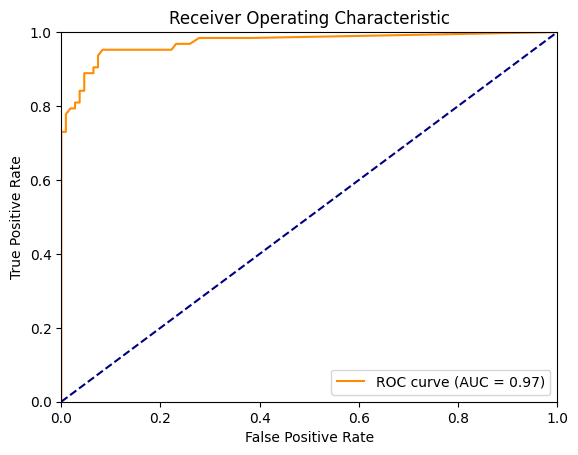

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


# Calculate the decision scores for the positive class
# decision_scores = model.decision_function(test_x)

# Calculate the predicted probabilities for the positive class
probabilities = model.predict_proba(test_x)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(test_y, probabilities)
print("ROC AUC:", roc_auc)

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(test_y, probabilities)

# Print the values of FPR, TPR, and thresholds
print("False Positive Rate (FPR):")
print(fpr)
print("True Positive Rate (TPR):")
print(tpr)
print("Thresholds:")
print(thresholds)

# Calculate the area under the ROC curve (AUC)
# roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
